In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [ ]:
# to get the files in proper order
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 160
color_img = []
path = '/content/drive/MyDrive/color'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '3600.jpg':
        break
    else:
        print(path + '/' + i + '.jpg')
        img = cv2.imread(path + '/' + i ,1)
        print(img)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        color_img.append(img_to_array(img))


gray_img = []
path = '/content/drive/MyDrive/bw'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
     if i == 'frame_100.jpg':
        break
     else:
        img = cv2.imread(path + '/'+i,1)

        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        gray_img.append(img_to_array(img))

  0%|          | 0/8883 [00:00<?, ?it/s]

/content/drive/MyDrive/color/frame_frame_0.jpg.jpg


  0%|          | 1/8883 [00:00<1:24:17,  1.76it/s]

[[[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 249 240]
  [255 249 240]
  [255 249 240]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 249 240]
  [255 249 240]
  [255 249 240]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [254 249 240]
  [254 249 240]
  [254 249 240]]

 ...

 [[ 33  90  81]
  [ 33  90  81]
  [ 31  88  79]
  ...
  [ 18  94  60]
  [ 18  94  60]
  [ 18  94  60]]

 [[ 26  83  74]
  [ 24  81  72]
  [ 22  79  70]
  ...
  [ 21  95  61]
  [ 21  95  61]
  [ 21  95  61]]

 [[ 22  79  70]
  [ 21  78  69]
  [ 19  76  67]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 19  93  59]]]
/content/drive/MyDrive/color/frame_frame_1.jpg.jpg


  0%|          | 2/8883 [00:01<1:51:20,  1.33it/s]

[[[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [255 250 241]
  [253 248 239]
  [254 249 240]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [255 250 241]
  [253 248 239]
  [254 249 240]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [255 250 241]
  [254 249 240]
  [254 249 240]]

 ...

 [[ 30  87  78]
  [ 28  85  76]
  [ 25  82  73]
  ...
  [ 17  93  59]
  [ 18  94  60]
  [ 18  94  60]]

 [[ 23  80  71]
  [ 21  78  69]
  [ 18  75  66]
  ...
  [ 21  95  61]
  [ 21  95  61]
  [ 22  96  62]]

 [[ 21  78  69]
  [ 19  76  67]
  [ 16  73  64]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 19  93  59]]]
/content/drive/MyDrive/color/frame_frame_2.jpg.jpg


  0%|          | 3/8883 [00:02<1:53:06,  1.31it/s]

[[[254 243 239]
  [254 243 239]
  [254 243 239]
  ...
  [255 250 241]
  [253 248 239]
  [254 249 240]]

 [[254 243 239]
  [254 243 239]
  [254 243 239]
  ...
  [255 250 241]
  [253 248 239]
  [254 249 240]]

 [[254 243 239]
  [254 243 239]
  [254 243 239]
  ...
  [255 250 241]
  [254 249 240]
  [254 249 240]]

 ...

 [[ 20  78  67]
  [ 16  74  63]
  [ 14  69  60]
  ...
  [ 18  94  60]
  [ 18  94  60]
  [ 18  94  60]]

 [[ 12  70  59]
  [  8  66  55]
  [  6  62  51]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 19  93  59]]

 [[  3  61  50]
  [  0  58  47]
  [  0  55  44]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 18  92  58]]]
/content/drive/MyDrive/color/frame_frame_3.jpg.jpg


  0%|          | 4/8883 [00:03<1:55:02,  1.29it/s]

[[[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[254 242 238]
  [254 242 238]
  [254 242 238]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 14  72  61]
  [ 10  68  57]
  [  9  64  55]
  ...
  [ 19  95  61]
  [ 19  95  61]
  [ 19  95  61]]

 [[ 11  67  56]
  [  6  62  51]
  [  3  59  48]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 20  94  60]]

 [[  6  62  51]
  [  1  57  46]
  [  0  54  43]
  ...
  [ 18  92  58]
  [ 18  92  58]
  [ 18  92  58]]]
/content/drive/MyDrive/color/frame_frame_4.jpg.jpg


  0%|          | 5/8883 [00:03<1:54:45,  1.29it/s]

[[[254 243 239]
  [254 243 239]
  [254 243 239]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[254 243 239]
  [254 243 239]
  [254 243 239]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[254 243 239]
  [254 243 239]
  [254 243 239]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 10  65  56]
  [  7  62  53]
  [  4  59  50]
  ...
  [ 18  94  60]
  [ 18  94  60]
  [ 16  93  59]]

 [[  7  60  50]
  [  4  57  47]
  [  1  54  44]
  ...
  [ 21  95  61]
  [ 21  95  61]
  [ 18  94  60]]

 [[  4  57  47]
  [  1  54  44]
  [  0  51  41]
  ...
  [ 18  92  58]
  [ 18  92  58]
  [ 18  92  58]]]
/content/drive/MyDrive/color/frame_frame_5.jpg.jpg


  0%|          | 6/8883 [00:04<2:00:33,  1.23it/s]

[[[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [255 248 239]
  [255 248 239]
  [255 250 241]]

 [[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [255 248 239]
  [255 248 239]
  [255 249 240]]

 ...

 [[  4  59  50]
  [  2  57  48]
  [  0  53  44]
  ...
  [ 17  93  61]
  [ 17  93  61]
  [ 17  93  61]]

 [[  5  58  49]
  [  1  54  45]
  [  0  51  42]
  ...
  [ 17  93  59]
  [ 17  93  59]
  [ 18  94  60]]

 [[  6  59  50]
  [  1  54  45]
  [  0  51  42]
  ...
  [ 17  93  59]
  [ 17  93  59]
  [ 17  93  59]]]
/content/drive/MyDrive/color/frame_frame_6.jpg.jpg


  0%|          | 7/8883 [00:05<1:59:35,  1.24it/s]

[[[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [255 248 239]
  [255 249 238]
  [255 250 239]]

 [[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [255 248 239]
  [255 249 238]
  [255 250 239]]

 [[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [255 248 239]
  [255 249 238]
  [255 249 238]]

 ...

 [[  5  56  49]
  [  0  51  44]
  [  0  47  40]
  ...
  [ 14  93  60]
  [ 14  93  60]
  [ 15  94  61]]

 [[  5  54  46]
  [  3  52  44]
  [  1  50  42]
  ...
  [ 17  94  60]
  [ 17  94  60]
  [ 17  94  60]]

 [[  4  53  45]
  [  2  51  43]
  [  0  48  40]
  ...
  [ 16  93  59]
  [ 16  93  59]
  [ 15  92  58]]]
/content/drive/MyDrive/color/frame_frame_7.jpg.jpg


  0%|          | 8/8883 [00:06<1:54:46,  1.29it/s]

[[[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [254 247 238]
  [254 246 239]
  [254 246 239]]

 [[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [254 247 238]
  [254 246 239]
  [254 246 239]]

 [[253 241 235]
  [253 241 235]
  [253 241 235]
  ...
  [254 247 238]
  [254 247 238]
  [254 247 238]]

 ...

 [[  1  52  44]
  [  0  47  39]
  [  0  45  37]
  ...
  [ 23  99  65]
  [ 23  99  65]
  [ 22  98  64]]

 [[  4  53  45]
  [  0  49  41]
  [  0  46  38]
  ...
  [ 21  95  61]
  [ 21  95  61]
  [ 21  95  61]]

 [[  3  52  44]
  [  0  49  41]
  [  0  47  39]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 19  93  59]]]
/content/drive/MyDrive/color/frame_frame_8.jpg.jpg


  0%|          | 9/8883 [00:06<1:51:42,  1.32it/s]

[[[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 247 238]
  [254 246 239]
  [254 246 239]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 247 238]
  [254 246 239]
  [254 246 239]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 247 238]
  [254 247 238]
  [254 247 238]]

 ...

 [[  0  49  41]
  [  0  49  41]
  [  0  47  39]
  ...
  [ 22  98  64]
  [ 22  98  64]
  [ 22  98  64]]

 [[  0  47  39]
  [  0  48  40]
  [  0  46  38]
  ...
  [ 21  95  61]
  [ 21  95  61]
  [ 20  94  60]]

 [[  2  51  43]
  [  3  52  44]
  [  0  48  40]
  ...
  [ 19  93  59]
  [ 19  93  59]
  [ 19  93  59]]]
/content/drive/MyDrive/color/frame_frame_9.jpg.jpg


  0%|          | 10/8883 [00:07<1:45:19,  1.40it/s]

[[[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [252 247 238]
  [251 246 237]
  [250 245 236]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [252 247 238]
  [251 246 237]
  [250 245 236]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 247 238]
  [251 246 237]
  [250 245 236]]

 ...

 [[  0  49  41]
  [  0  49  41]
  [  0  48  40]
  ...
  [ 23  99  65]
  [ 23  99  65]
  [ 23  99  65]]

 [[  0  49  41]
  [  0  49  41]
  [  0  47  39]
  ...
  [ 23  97  63]
  [ 23  97  63]
  [ 23  97  63]]

 [[  3  52  44]
  [  2  51  43]
  [  0  49  41]
  ...
  [ 21  95  61]
  [ 20  94  60]
  [ 20  94  60]]]
/content/drive/MyDrive/color/frame_frame_10.jpg.jpg


  0%|          | 11/8883 [00:08<1:44:45,  1.41it/s]

[[[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 248 237]
  [254 248 237]
  [254 248 237]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 248 237]
  [254 248 237]
  [254 248 237]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 248 237]
  [254 248 237]
  [254 248 237]]

 ...

 [[  0  49  42]
  [  0  50  43]
  [  0  51  44]
  ...
  [ 27 104  70]
  [ 27 104  70]
  [ 27 104  70]]

 [[  0  47  41]
  [  0  48  41]
  [  0  48  41]
  ...
  [ 21  97  63]
  [ 22  98  64]
  [ 21  97  63]]

 [[  3  51  45]
  [  2  50  44]
  [  0  49  42]
  ...
  [ 21  97  63]
  [ 21  97  63]
  [ 21  97  63]]]
/content/drive/MyDrive/color/frame_frame_11.jpg.jpg


  0%|          | 12/8883 [00:08<1:47:11,  1.38it/s]

[[[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [252 247 238]
  [251 246 237]
  [250 245 236]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [252 247 238]
  [251 246 237]
  [250 245 236]]

 [[252 240 234]
  [252 240 234]
  [252 240 234]
  ...
  [254 247 238]
  [251 246 237]
  [250 245 236]]

 ...

 [[  0  49  42]
  [  0  50  43]
  [  1  52  45]
  ...
  [ 22  99  65]
  [ 22  99  65]
  [ 22  99  65]]

 [[  0  48  42]
  [  0  49  42]
  [  0  48  41]
  ...
  [ 23  99  65]
  [ 23  99  65]
  [ 23  99  65]]

 [[  4  52  46]
  [  2  50  44]
  [  0  49  42]
  ...
  [ 18  94  60]
  [ 18  94  60]
  [ 18  94  60]]]
/content/drive/MyDrive/color/frame_frame_12.jpg.jpg


  0%|          | 13/8883 [00:09<1:43:34,  1.43it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 238]
  [254 247 238]
  [254 247 238]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 238]
  [254 247 238]
  [254 247 238]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 238]
  [254 247 238]
  [254 247 238]]

 ...

 [[  0  52  42]
  [  4  56  46]
  [  8  59  51]
  ...
  [ 18  98  63]
  [ 18  98  63]
  [ 17  97  62]]

 [[  2  52  42]
  [  3  53  43]
  [  8  57  49]
  ...
  [ 20 100  65]
  [ 19  99  64]
  [ 18  98  63]]

 [[  4  54  44]
  [  3  53  43]
  [  7  56  48]
  ...
  [ 15  95  60]
  [ 14  94  59]
  [ 14  94  59]]]
/content/drive/MyDrive/color/frame_frame_13.jpg.jpg


  0%|          | 14/8883 [00:10<1:44:42,  1.41it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 238]
  [253 246 237]
  [253 246 237]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 238]
  [254 247 238]
  [253 246 237]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 238]
  [254 247 238]
  [254 247 238]]

 ...

 [[  0  50  40]
  [  3  55  45]
  [  9  60  52]
  ...
  [ 19  99  64]
  [ 19  99  64]
  [ 18  98  63]]

 [[  0  50  40]
  [  3  53  43]
  [  9  58  50]
  ...
  [ 20 100  65]
  [ 20 100  65]
  [ 20 100  65]]

 [[  2  52  42]
  [  4  54  44]
  [  9  58  50]
  ...
  [ 16  96  61]
  [ 16  96  61]
  [ 16  96  61]]]
/content/drive/MyDrive/color/frame_frame_14.jpg.jpg


  0%|          | 15/8883 [00:11<1:46:23,  1.39it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 237]
  [255 247 237]
  [255 247 237]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 237]
  [255 247 237]
  [255 247 237]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 247 237]
  [255 247 237]
  [255 247 237]]

 ...

 [[  2  54  44]
  [  7  59  49]
  [ 11  64  55]
  ...
  [ 21 101  66]
  [ 19  99  64]
  [ 18  98  63]]

 [[  0  52  42]
  [  6  58  48]
  [ 12  65  56]
  ...
  [ 22 102  67]
  [ 21 101  66]
  [ 20 100  65]]

 [[  0  50  40]
  [  5  57  47]
  [ 12  65  56]
  ...
  [ 18  98  63]
  [ 17  97  62]
  [ 15  95  60]]]
/content/drive/MyDrive/color/frame_frame_15.jpg.jpg


  0%|          | 16/8883 [00:11<1:48:30,  1.36it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[  9  61  51]
  [ 12  64  54]
  [ 16  69  60]
  ...
  [ 20 100  65]
  [ 19  99  64]
  [ 19  99  64]]

 [[  4  56  46]
  [ 10  62  52]
  [ 16  69  60]
  ...
  [ 22 102  67]
  [ 21 101  66]
  [ 20 100  65]]

 [[  4  56  46]
  [ 12  64  54]
  [ 19  72  63]
  ...
  [ 17  97  62]
  [ 16  96  61]
  [ 16  96  61]]]
/content/drive/MyDrive/color/frame_frame_16.jpg.jpg


  0%|          | 17/8883 [00:12<1:51:23,  1.33it/s]

[[[250 238 232]
  [250 238 232]
  [250 238 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[250 238 232]
  [250 238 232]
  [250 238 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[250 238 232]
  [250 238 232]
  [250 238 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[ 10  62  52]
  [ 13  65  55]
  [ 17  70  61]
  ...
  [ 21 101  66]
  [ 20 100  65]
  [ 20 100  65]]

 [[  6  58  48]
  [ 11  63  53]
  [ 17  70  61]
  ...
  [ 23 103  68]
  [ 22 102  67]
  [ 22 102  67]]

 [[  7  59  49]
  [ 15  67  57]
  [ 22  75  66]
  ...
  [ 19  99  64]
  [ 18  98  63]
  [ 19  99  64]]]
/content/drive/MyDrive/color/frame_frame_17.jpg.jpg


  0%|          | 18/8883 [00:13<1:49:58,  1.34it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[ 12  64  57]
  [ 16  68  61]
  [ 21  73  66]
  ...
  [ 22  98  66]
  [ 22  98  66]
  [ 21  97  65]]

 [[ 10  62  55]
  [ 16  68  61]
  [ 21  73  66]
  ...
  [ 24 101  67]
  [ 23 100  66]
  [ 23 100  66]]

 [[ 13  65  58]
  [ 18  70  63]
  [ 23  75  68]
  ...
  [ 24 101  67]
  [ 24 101  67]
  [ 24 101  67]]]
/content/drive/MyDrive/color/frame_frame_18.jpg.jpg


  0%|          | 19/8883 [00:14<1:45:04,  1.41it/s]

[[[250 238 232]
  [250 238 232]
  [250 238 232]
  ...
  [255 244 236]
  [255 244 236]
  [255 244 236]]

 [[250 238 232]
  [250 238 232]
  [250 238 232]
  ...
  [255 244 236]
  [255 244 236]
  [255 244 236]]

 [[250 238 232]
  [250 238 232]
  [250 238 232]
  ...
  [255 244 236]
  [255 244 236]
  [255 244 236]]

 ...

 [[ 13  65  58]
  [ 18  70  63]
  [ 21  73  66]
  ...
  [ 22  98  66]
  [ 22  98  66]
  [ 22  98  66]]

 [[ 13  65  58]
  [ 19  71  64]
  [ 22  74  67]
  ...
  [ 24 101  67]
  [ 24 101  67]
  [ 23 100  66]]

 [[ 15  67  60]
  [ 22  74  67]
  [ 24  76  69]
  ...
  [ 25 102  68]
  [ 24 101  67]
  [ 24 101  67]]]
/content/drive/MyDrive/color/frame_frame_19.jpg.jpg


  0%|          | 20/8883 [00:14<1:47:02,  1.38it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[ 17  69  62]
  [ 21  73  66]
  [ 23  75  68]
  ...
  [ 22  98  66]
  [ 22  98  66]
  [ 22  98  66]]

 [[ 16  68  61]
  [ 21  73  66]
  [ 22  74  67]
  ...
  [ 24 101  67]
  [ 24 101  67]
  [ 23 100  66]]

 [[ 18  70  63]
  [ 23  75  68]
  [ 25  77  70]
  ...
  [ 24 101  67]
  [ 24 101  67]
  [ 23 100  66]]]
/content/drive/MyDrive/color/frame_frame_20.jpg.jpg


  0%|          | 21/8883 [00:15<1:44:24,  1.41it/s]

[[[250 238 234]
  [250 238 234]
  [250 238 234]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[250 238 234]
  [250 238 234]
  [250 238 234]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[250 238 234]
  [250 238 234]
  [250 238 234]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[ 19  73  66]
  [ 21  75  68]
  [ 22  76  69]
  ...
  [ 24  99  67]
  [ 23  98  66]
  [ 23  98  66]]

 [[ 19  73  66]
  [ 20  74  67]
  [ 20  74  67]
  ...
  [ 23  99  65]
  [ 23  99  65]
  [ 23  99  65]]

 [[ 21  75  68]
  [ 23  77  70]
  [ 23  77  70]
  ...
  [ 25 101  67]
  [ 25 101  67]
  [ 24 100  66]]]
/content/drive/MyDrive/color/frame_frame_21.jpg.jpg


  0%|          | 22/8883 [00:16<1:44:14,  1.42it/s]

[[[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[ 20  76  65]
  [ 22  78  67]
  [ 23  78  69]
  ...
  [ 23  98  66]
  [ 22  97  65]
  [ 22  97  65]]

 [[ 20  76  65]
  [ 21  77  66]
  [ 21  76  67]
  ...
  [ 23  99  65]
  [ 22  98  64]
  [ 22  98  64]]

 [[ 22  78  67]
  [ 23  79  68]
  [ 23  78  69]
  ...
  [ 23  99  65]
  [ 24 100  66]
  [ 24 100  66]]]
/content/drive/MyDrive/color/frame_frame_22.jpg.jpg


  0%|          | 23/8883 [00:16<1:44:19,  1.42it/s]

[[[250 238 234]
  [250 238 234]
  [250 238 234]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[250 238 234]
  [250 238 234]
  [250 238 234]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 [[250 238 234]
  [250 238 234]
  [250 238 234]
  ...
  [255 246 236]
  [255 246 236]
  [255 246 236]]

 ...

 [[ 20  77  69]
  [ 21  78  70]
  [ 23  77  70]
  ...
  [ 23  98  66]
  [ 22  97  65]
  [ 22  97  65]]

 [[ 21  75  68]
  [ 21  75  68]
  [ 21  75  68]
  ...
  [ 23  99  65]
  [ 22  98  64]
  [ 22  98  64]]

 [[ 22  76  69]
  [ 22  76  69]
  [ 23  77  70]
  ...
  [ 23  99  65]
  [ 23  99  65]
  [ 23  99  65]]]
/content/drive/MyDrive/color/frame_frame_23.jpg.jpg


  0%|          | 24/8883 [00:17<1:42:50,  1.44it/s]

[[[255 239 232]
  [255 239 232]
  [255 239 232]
  ...
  [254 243 235]
  [255 243 235]
  [255 242 234]]

 [[255 239 232]
  [255 239 232]
  [255 239 232]
  ...
  [254 243 235]
  [255 243 235]
  [255 243 235]]

 [[253 240 232]
  [253 240 232]
  [253 240 232]
  ...
  [254 243 235]
  [254 243 235]
  [254 243 235]]

 ...

 [[ 17  74  65]
  [ 19  76  67]
  [ 22  77  68]
  ...
  [ 22  98  66]
  [ 21  97  65]
  [ 20  96  64]]

 [[ 22  77  68]
  [ 23  78  69]
  [ 25  78  69]
  ...
  [ 23  99  67]
  [ 22  98  66]
  [ 21  97  65]]

 [[ 23  78  69]
  [ 23  78  69]
  [ 24  77  68]
  ...
  [ 22  98  66]
  [ 21  97  65]
  [ 21  97  65]]]
/content/drive/MyDrive/color/frame_frame_24.jpg.jpg


  0%|          | 25/8883 [00:18<1:35:57,  1.54it/s]

[[[251 238 230]
  [251 238 230]
  [251 238 230]
  ...
  [255 246 238]
  [255 246 236]
  [255 245 235]]

 [[251 238 230]
  [251 238 230]
  [251 238 230]
  ...
  [255 246 238]
  [255 246 236]
  [255 245 235]]

 [[249 238 230]
  [249 238 230]
  [249 238 230]
  ...
  [255 246 238]
  [255 247 237]
  [255 246 236]]

 ...

 [[ 15  71  72]
  [ 16  72  73]
  [ 18  74  75]
  ...
  [ 20  96  62]
  [ 23  99  65]
  [ 27 103  69]]

 [[ 16  70  71]
  [ 19  73  74]
  [ 21  77  78]
  ...
  [ 21  98  64]
  [ 23 100  66]
  [ 25 102  68]]

 [[ 19  73  74]
  [ 22  76  77]
  [ 24  80  81]
  ...
  [ 21  98  64]
  [ 22  99  65]
  [ 24 101  67]]]
/content/drive/MyDrive/color/frame_frame_25.jpg.jpg


  0%|          | 26/8883 [00:18<1:36:54,  1.52it/s]

[[[255 234 232]
  [255 234 232]
  [255 235 230]
  ...
  [255 246 238]
  [255 246 236]
  [255 245 235]]

 [[255 234 232]
  [255 234 232]
  [255 235 230]
  ...
  [255 246 238]
  [255 246 236]
  [255 245 235]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 246 238]
  [255 247 237]
  [255 246 236]]

 ...

 [[ 14  71  72]
  [ 16  72  73]
  [ 20  73  76]
  ...
  [ 21  97  63]
  [ 25 101  67]
  [ 27 103  69]]

 [[ 14  70  71]
  [ 17  73  74]
  [ 23  76  79]
  ...
  [ 21  98  64]
  [ 23 100  66]
  [ 25 102  68]]

 [[ 17  73  74]
  [ 20  76  77]
  [ 26  79  82]
  ...
  [ 22  99  65]
  [ 23 100  66]
  [ 24 101  67]]]
/content/drive/MyDrive/color/frame_frame_26.jpg.jpg


  0%|          | 27/8883 [00:19<1:40:44,  1.47it/s]

[[[255 234 232]
  [255 234 232]
  [255 235 230]
  ...
  [254 247 238]
  [254 248 237]
  [254 248 237]]

 [[255 234 232]
  [255 234 232]
  [255 235 230]
  ...
  [254 247 238]
  [254 248 237]
  [254 248 237]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [254 248 237]
  [254 248 237]
  [255 249 238]]

 ...

 [[ 20  74  75]
  [ 22  76  77]
  [ 24  77  80]
  ...
  [ 20  96  62]
  [ 24 100  66]
  [ 27 103  69]]

 [[ 24  75  77]
  [ 25  79  80]
  [ 27  80  83]
  ...
  [ 22  98  64]
  [ 24 101  67]
  [ 25 102  68]]

 [[ 24  75  77]
  [ 29  80  82]
  [ 29  82  85]
  ...
  [ 25 101  67]
  [ 25 102  68]
  [ 24 101  67]]]
/content/drive/MyDrive/color/frame_frame_27.jpg.jpg


  0%|          | 28/8883 [00:20<1:41:27,  1.45it/s]

[[[255 235 230]
  [255 235 230]
  [255 235 230]
  ...
  [254 247 238]
  [254 248 237]
  [254 248 237]]

 [[255 235 230]
  [255 235 230]
  [255 235 230]
  ...
  [254 247 238]
  [254 248 237]
  [254 248 237]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [254 248 237]
  [254 248 237]
  [255 249 238]]

 ...

 [[ 23  77  78]
  [ 24  78  79]
  [ 25  78  81]
  ...
  [ 24 100  66]
  [ 27 103  69]
  [ 26 102  68]]

 [[ 27  78  80]
  [ 27  81  82]
  [ 29  82  85]
  ...
  [ 23  99  65]
  [ 25 102  68]
  [ 25 102  68]]

 [[ 26  77  79]
  [ 30  81  83]
  [ 30  83  86]
  ...
  [ 24 100  66]
  [ 24 101  67]
  [ 26 103  69]]]
/content/drive/MyDrive/color/frame_frame_28.jpg.jpg


  0%|          | 29/8883 [00:20<1:36:35,  1.53it/s]

[[[255 235 230]
  [255 235 230]
  [255 235 230]
  ...
  [255 249 238]
  [255 249 238]
  [254 248 237]]

 [[255 235 230]
  [255 235 230]
  [255 235 230]
  ...
  [255 249 238]
  [255 249 238]
  [255 249 238]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 24  79  82]
  [ 24  79  82]
  [ 23  79  80]
  ...
  [ 25  96  63]
  [ 27  98  65]
  [ 25  96  63]]

 [[ 26  81  84]
  [ 25  80  83]
  [ 22  79  80]
  ...
  [ 28 100  64]
  [ 28 102  66]
  [ 27 101  65]]

 [[ 28  83  86]
  [ 27  82  85]
  [ 23  80  81]
  ...
  [ 28 100  64]
  [ 28 102  66]
  [ 27 101  65]]]
/content/drive/MyDrive/color/frame_frame_29.jpg.jpg


  0%|          | 30/8883 [00:21<1:38:59,  1.49it/s]

[[[255 235 230]
  [255 235 230]
  [255 235 230]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[255 235 230]
  [255 235 230]
  [255 235 230]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 ...

 [[ 24  79  82]
  [ 24  79  82]
  [ 22  79  80]
  ...
  [ 24  95  62]
  [ 26  97  64]
  [ 28  99  66]]

 [[ 26  81  84]
  [ 25  80  83]
  [ 21  78  79]
  ...
  [ 26  98  62]
  [ 26 100  64]
  [ 28 102  66]]

 [[ 29  84  87]
  [ 26  81  84]
  [ 22  79  80]
  ...
  [ 26  98  62]
  [ 26 100  64]
  [ 27 101  65]]]
/content/drive/MyDrive/color/frame_frame_30.jpg.jpg


  0%|          | 31/8883 [00:22<1:45:07,  1.40it/s]

[[[255 234 232]
  [255 234 232]
  [255 234 232]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[255 234 232]
  [255 234 232]
  [255 234 232]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 ...

 [[ 26  79  82]
  [ 25  78  81]
  [ 22  77  80]
  ...
  [ 22  93  60]
  [ 23  94  61]
  [ 25  96  63]]

 [[ 28  81  84]
  [ 26  79  82]
  [ 22  77  80]
  ...
  [ 25  99  63]
  [ 27 101  65]
  [ 28 102  66]]

 [[ 31  84  87]
  [ 25  80  83]
  [ 21  76  79]
  ...
  [ 23  97  61]
  [ 24  98  62]
  [ 24  98  62]]]
/content/drive/MyDrive/color/frame_frame_31.jpg.jpg


  0%|          | 32/8883 [00:23<1:47:28,  1.37it/s]

[[[255 234 232]
  [255 234 232]
  [255 234 232]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[255 234 232]
  [255 234 232]
  [255 234 232]
  ...
  [255 248 239]
  [255 249 240]
  [255 250 241]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 ...

 [[ 24  77  80]
  [ 25  78  81]
  [ 23  78  81]
  ...
  [ 25  96  63]
  [ 26  97  64]
  [ 28  99  66]]

 [[ 25  80  83]
  [ 25  80  83]
  [ 23  78  81]
  ...
  [ 22  94  58]
  [ 22  94  58]
  [ 23  95  59]]

 [[ 27  82  85]
  [ 25  80  83]
  [ 22  77  80]
  ...
  [ 25  97  61]
  [ 26  98  62]
  [ 28 100  64]]]
/content/drive/MyDrive/color/frame_frame_32.jpg.jpg


  0%|          | 33/8883 [00:23<1:50:11,  1.34it/s]

[[[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 238]
  [255 248 239]
  [255 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 238]
  [255 248 239]
  [255 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 ...

 [[ 26  79  82]
  [ 24  77  80]
  [ 21  77  78]
  ...
  [ 24  95  62]
  [ 25  96  63]
  [ 26  97  64]]

 [[ 28  81  84]
  [ 25  78  81]
  [ 22  78  79]
  ...
  [ 22  94  58]
  [ 23  95  59]
  [ 25  97  61]]

 [[ 28  81  84]
  [ 25  78  81]
  [ 21  77  78]
  ...
  [ 25  97  61]
  [ 26  98  62]
  [ 27  99  63]]]
/content/drive/MyDrive/color/frame_frame_33.jpg.jpg


  0%|          | 34/8883 [00:24<1:48:03,  1.36it/s]

[[[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 238]
  [255 248 239]
  [255 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 238]
  [255 248 239]
  [255 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 ...

 [[ 24  79  82]
  [ 23  78  81]
  [ 22  78  79]
  ...
  [ 24  92  61]
  [ 24  92  61]
  [ 25  93  62]]

 [[ 25  80  83]
  [ 23  78  81]
  [ 22  78  79]
  ...
  [ 29  98  65]
  [ 30  99  66]
  [ 30  99  66]]

 [[ 27  82  85]
  [ 23  78  81]
  [ 20  76  77]
  ...
  [ 27  96  63]
  [ 28  97  64]
  [ 27  96  63]]]
/content/drive/MyDrive/color/frame_frame_34.jpg.jpg


  0%|          | 35/8883 [00:25<1:43:35,  1.42it/s]

[[[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 248 239]
  [253 248 239]
  [253 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 248 239]
  [253 248 239]
  [253 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 23  76  79]
  [ 20  75  78]
  [ 17  74  75]
  ...
  [ 21  89  58]
  [ 22  89  58]
  [ 22  89  58]]

 [[ 23  76  79]
  [ 19  74  77]
  [ 16  73  74]
  ...
  [ 24  93  60]
  [ 25  94  61]
  [ 24  93  60]]

 [[ 22  75  78]
  [ 18  73  76]
  [ 16  73  74]
  ...
  [ 28  97  64]
  [ 30  99  66]
  [ 30  99  66]]]
/content/drive/MyDrive/color/frame_frame_35.jpg.jpg


  0%|          | 36/8883 [00:25<1:48:56,  1.35it/s]

[[[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 248 239]
  [253 248 239]
  [253 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 248 239]
  [253 248 239]
  [253 248 239]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 16  75  77]
  [ 15  74  76]
  [ 14  71  72]
  ...
  [ 21  89  58]
  [ 22  89  58]
  [ 22  89  58]]

 [[ 16  75  77]
  [ 14  73  75]
  [ 13  70  71]
  ...
  [ 24  93  60]
  [ 24  93  60]
  [ 24  93  60]]

 [[ 16  75  77]
  [ 13  72  74]
  [ 14  71  72]
  ...
  [ 29  98  65]
  [ 29  98  65]
  [ 30  99  66]]]
/content/drive/MyDrive/color/frame_frame_36.jpg.jpg


  0%|          | 37/8883 [00:26<1:49:51,  1.34it/s]

[[[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 248 239]
  [254 247 238]
  [254 247 238]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 [[254 236 229]
  [254 236 229]
  [254 235 230]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 16  75  77]
  [ 15  74  76]
  [ 14  71  72]
  ...
  [ 22  90  59]
  [ 22  90  59]
  [ 22  90  59]]

 [[ 16  75  77]
  [ 14  73  75]
  [ 13  70  71]
  ...
  [ 24  93  60]
  [ 24  93  60]
  [ 24  93  60]]

 [[ 16  75  77]
  [ 13  72  74]
  [ 14  71  72]
  ...
  [ 27  96  63]
  [ 27  96  63]
  [ 26  95  62]]]
/content/drive/MyDrive/color/frame_frame_37.jpg.jpg


  0%|          | 38/8883 [00:27<1:51:50,  1.32it/s]

[[[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 248 239]
  [255 248 239]
  [254 247 238]]

 [[254 235 230]
  [254 235 230]
  [254 235 230]
  ...
  [255 249 240]
  [255 249 240]
  [255 249 240]]

 [[254 236 229]
  [254 236 229]
  [254 235 230]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[ 11  73  73]
  [ 11  71  71]
  [ 13  70  69]
  ...
  [ 25  92  61]
  [ 25  92  61]
  [ 24  91  60]]

 [[ 15  75  75]
  [ 16  73  74]
  [ 16  73  72]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 23  90  59]]

 [[ 13  73  73]
  [ 16  73  74]
  [ 16  73  72]
  ...
  [ 24  91  60]
  [ 24  91  60]
  [ 24  91  60]]]
/content/drive/MyDrive/color/frame_frame_38.jpg.jpg


  0%|          | 39/8883 [00:28<1:48:16,  1.36it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [252 247 238]
  [252 247 238]
  [252 247 238]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 248 239]
  [253 248 239]
  [253 248 239]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 248 239]
  [252 249 241]
  [252 249 241]]

 ...

 [[ 10  70  70]
  [ 11  68  69]
  [ 11  68  67]
  ...
  [ 24  91  60]
  [ 24  91  60]
  [ 24  91  60]]

 [[  8  68  68]
  [ 10  67  68]
  [ 10  67  66]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 22  89  58]]

 [[  8  68  68]
  [  9  66  67]
  [ 10  67  66]
  ...
  [ 24  91  60]
  [ 24  91  60]
  [ 24  91  60]]]
/content/drive/MyDrive/color/frame_frame_39.jpg.jpg


  0%|          | 40/8883 [00:28<1:46:36,  1.38it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 249 240]
  [253 247 240]
  [253 247 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 249 240]
  [253 247 240]
  [253 247 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 247 240]
  [253 247 240]
  [253 247 240]]

 ...

 [[ 12  72  72]
  [ 12  69  70]
  [ 12  69  68]
  ...
  [ 25  92  61]
  [ 24  91  60]
  [ 23  90  59]]

 [[ 11  71  71]
  [ 11  68  69]
  [ 11  68  67]
  ...
  [ 27  94  63]
  [ 27  94  63]
  [ 27  94  63]]

 [[ 10  70  70]
  [ 11  68  69]
  [ 11  68  67]
  ...
  [ 29  96  65]
  [ 30  97  66]
  [ 30  97  66]]]
/content/drive/MyDrive/color/frame_frame_40.jpg.jpg


  0%|          | 41/8883 [00:29<1:47:43,  1.37it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 249 240]
  [253 247 240]
  [253 247 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 249 240]
  [253 247 240]
  [253 247 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 247 240]
  [253 247 240]
  [253 247 240]]

 ...

 [[  8  70  70]
  [  9  69  69]
  [ 10  68  67]
  ...
  [ 25  92  61]
  [ 24  91  60]
  [ 24  91  60]]

 [[  5  67  67]
  [  8  68  68]
  [  9  67  66]
  ...
  [ 27  94  63]
  [ 27  94  63]
  [ 27  94  63]]

 [[  4  66  66]
  [  7  67  67]
  [  8  66  65]
  ...
  [ 29  96  65]
  [ 30  97  66]
  [ 31  98  67]]]
/content/drive/MyDrive/color/frame_frame_41.jpg.jpg


  0%|          | 42/8883 [00:30<1:49:53,  1.34it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 251 241]
  [253 251 241]
  [252 250 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 251 241]
  [252 250 240]
  [252 250 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 251 241]
  [252 250 239]
  [251 249 238]]

 ...

 [[ 11  67  68]
  [ 11  67  68]
  [ 12  66  66]
  ...
  [ 24  91  60]
  [ 24  91  60]
  [ 23  90  59]]

 [[ 12  66  67]
  [ 11  65  66]
  [ 11  65  65]
  ...
  [ 27  94  63]
  [ 30  94  64]
  [ 29  93  63]]

 [[ 13  67  68]
  [ 12  66  66]
  [ 10  64  64]
  ...
  [ 29  96  65]
  [ 32  96  66]
  [ 32  96  66]]]
/content/drive/MyDrive/color/frame_frame_42.jpg.jpg


  0%|          | 43/8883 [00:31<1:44:26,  1.41it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 251 241]
  [253 251 241]
  [252 250 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 251 241]
  [252 250 240]
  [252 250 240]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [253 251 241]
  [252 250 239]
  [251 249 238]]

 ...

 [[ 13  67  68]
  [ 13  67  68]
  [ 14  66  66]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 22  89  58]]

 [[ 13  64  66]
  [ 13  64  66]
  [ 13  65  65]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 23  90  59]]

 [[ 14  65  67]
  [ 12  63  65]
  [ 10  62  62]
  ...
  [ 27  94  63]
  [ 28  95  64]
  [ 28  95  64]]]
/content/drive/MyDrive/color/frame_frame_43.jpg.jpg


  0%|          | 44/8883 [00:31<1:48:07,  1.36it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 253 243]
  [253 252 242]
  [252 251 241]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 253 243]
  [253 252 242]
  [252 251 241]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 253 243]
  [253 253 241]
  [253 253 241]]

 ...

 [[ 11  65  66]
  [ 12  66  66]
  [ 13  65  65]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 23  90  59]]

 [[ 13  65  65]
  [ 14  66  66]
  [ 12  64  64]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 23  90  59]]

 [[ 13  65  65]
  [ 13  65  65]
  [ 10  63  60]
  ...
  [ 28  95  64]
  [ 27  94  63]
  [ 27  94  63]]]
/content/drive/MyDrive/color/frame_frame_44.jpg.jpg


  1%|          | 45/8883 [00:32<1:45:45,  1.39it/s]

[[[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 254 242]
  [254 254 242]
  [254 254 242]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 254 242]
  [254 254 242]
  [254 254 242]]

 [[255 236 229]
  [255 236 229]
  [255 236 229]
  ...
  [254 253 243]
  [254 253 243]
  [254 253 243]]

 ...

 [[ 12  66  67]
  [ 10  64  64]
  [  8  63  60]
  ...
  [ 21  88  57]
  [ 20  87  56]
  [ 22  89  58]]

 [[ 10  67  66]
  [  9  66  65]
  [ 10  65  62]
  ...
  [ 21  88  57]
  [ 20  87  56]
  [ 21  88  57]]

 [[  9  66  65]
  [  5  62  61]
  [  5  60  57]
  ...
  [ 24  91  60]
  [ 24  91  60]
  [ 24  91  60]]]
/content/drive/MyDrive/color/frame_frame_45.jpg.jpg


  1%|          | 46/8883 [00:33<1:44:23,  1.41it/s]

[[[253 231 225]
  [253 231 225]
  [254 232 226]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 231 225]
  [253 231 225]
  [253 231 225]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 231 225]
  [253 231 225]
  [253 231 225]
  ...
  [255 255 244]
  [255 255 245]
  [255 255 245]]

 ...

 [[ 10  60  58]
  [  7  57  55]
  [  4  53  51]
  ...
  [ 16  83  52]
  [ 16  83  52]
  [ 16  83  52]]

 [[ 12  65  62]
  [  9  62  59]
  [  8  58  56]
  ...
  [ 21  88  57]
  [ 21  88  57]
  [ 20  87  56]]

 [[ 11  64  61]
  [ 10  63  60]
  [ 10  60  58]
  ...
  [ 23  90  59]
  [ 23  90  59]
  [ 23  90  59]]]
/content/drive/MyDrive/color/frame_frame_46.jpg.jpg


  1%|          | 47/8883 [00:33<1:38:22,  1.50it/s]

[[[253 231 225]
  [253 231 225]
  [254 232 226]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 231 225]
  [253 231 225]
  [253 231 225]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 231 225]
  [253 231 225]
  [253 231 225]
  ...
  [255 255 244]
  [255 255 245]
  [255 255 245]]

 ...

 [[  9  56  54]
  [ 11  58  56]
  [ 11  58  56]
  ...
  [ 15  82  51]
  [ 15  82  51]
  [ 15  82  51]]

 [[ 12  62  60]
  [ 12  62  60]
  [ 10  59  57]
  ...
  [ 22  89  58]
  [ 22  89  58]
  [ 22  89  58]]

 [[  9  62  59]
  [ 11  64  61]
  [ 13  63  61]
  ...
  [ 22  89  58]
  [ 22  89  58]
  [ 23  90  59]]]
/content/drive/MyDrive/color/frame_frame_47.jpg.jpg


  1%|          | 48/8883 [00:34<1:39:52,  1.47it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 244]
  [255 255 245]
  [255 255 245]]

 ...

 [[ 10  57  55]
  [  9  56  54]
  [ 11  55  54]
  ...
  [ 14  81  50]
  [ 14  81  50]
  [ 14  81  50]]

 [[ 11  62  58]
  [ 12  63  59]
  [ 12  61  59]
  ...
  [ 20  87  56]
  [ 20  87  56]
  [ 20  87  56]]

 [[ 10  64  59]
  [ 12  66  61]
  [ 14  64  62]
  ...
  [ 21  88  57]
  [ 22  89  58]
  [ 22  89  58]]]
/content/drive/MyDrive/color/frame_frame_48.jpg.jpg


  1%|          | 49/8883 [00:35<1:38:11,  1.50it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 244]
  [255 255 244]
  [255 255 244]]

 ...

 [[ 14  58  57]
  [ 11  55  54]
  [ 10  55  52]
  ...
  [  9  77  46]
  [ 10  77  46]
  [ 10  77  46]]

 [[ 13  62  60]
  [ 10  59  57]
  [ 11  61  57]
  ...
  [ 17  84  53]
  [ 19  83  53]
  [ 19  83  53]]

 [[ 12  62  60]
  [ 10  60  58]
  [ 11  62  58]
  ...
  [ 24  91  60]
  [ 26  90  60]
  [ 27  91  61]]]
/content/drive/MyDrive/color/frame_frame_49.jpg.jpg


  1%|          | 50/8883 [00:35<1:38:09,  1.50it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 [[251 229 223]
  [251 229 223]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 244]
  [255 255 244]
  [255 255 244]]

 ...

 [[ 14  56  55]
  [ 15  59  58]
  [ 18  65  62]
  ...
  [  8  76  45]
  [  8  75  44]
  [  8  75  44]]

 [[ 14  63  61]
  [ 18  68  66]
  [ 22  76  71]
  ...
  [ 14  81  50]
  [ 16  80  50]
  [ 17  81  51]]

 [[ 14  67  64]
  [ 18  73  70]
  [ 23  79  74]
  ...
  [ 22  89  58]
  [ 25  89  59]
  [ 26  90  60]]]
/content/drive/MyDrive/color/frame_frame_50.jpg.jpg


  1%|          | 51/8883 [00:36<1:38:06,  1.50it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 [[251 229 223]
  [251 229 223]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 255 243]
  [255 255 243]
  [255 255 243]]

 ...

 [[ 14  62  56]
  [ 17  65  59]
  [ 19  70  62]
  ...
  [  3  71  40]
  [  4  71  40]
  [  4  71  40]]

 [[ 20  72  65]
  [ 23  75  68]
  [ 23  78  69]
  ...
  [ 13  80  49]
  [ 15  79  49]
  [ 16  80  50]]

 [[ 23  77  70]
  [ 25  79  72]
  [ 25  82  73]
  ...
  [ 19  86  55]
  [ 22  86  56]
  [ 23  87  57]]]
/content/drive/MyDrive/color/frame_frame_51.jpg.jpg


  1%|          | 52/8883 [00:37<1:35:23,  1.54it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [253 254 244]
  [254 255 245]
  [254 255 245]]

 [[251 229 223]
  [251 229 223]
  [252 230 224]
  ...
  [253 254 244]
  [253 254 244]
  [253 254 244]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [254 255 245]
  [254 255 245]
  [254 255 245]]

 ...

 [[ 13  68  59]
  [ 16  71  62]
  [ 19  76  67]
  ...
  [  2  69  38]
  [  3  70  39]
  [  4  71  40]]

 [[ 26  79  70]
  [ 25  80  71]
  [ 25  83  72]
  ...
  [  6  73  42]
  [  8  72  42]
  [  9  73  43]]

 [[ 32  85  76]
  [ 29  84  75]
  [ 29  85  74]
  ...
  [ 18  85  54]
  [ 20  84  54]
  [ 21  85  55]]]
/content/drive/MyDrive/color/frame_frame_52.jpg.jpg


  1%|          | 53/8883 [00:37<1:35:25,  1.54it/s]

[[[253 230 228]
  [252 229 227]
  [252 229 227]
  ...
  [253 254 244]
  [253 254 244]
  [254 255 245]]

 [[251 228 226]
  [251 228 226]
  [251 228 226]
  ...
  [253 254 244]
  [253 254 244]
  [253 254 244]]

 [[252 229 227]
  [251 228 226]
  [252 229 227]
  ...
  [253 254 244]
  [254 255 245]
  [254 255 245]]

 ...

 [[ 17  70  61]
  [ 24  77  68]
  [ 26  81  72]
  ...
  [  0  63  34]
  [  0  60  31]
  [  0  60  31]]

 [[ 27  80  71]
  [ 31  84  75]
  [ 31  87  76]
  ...
  [  4  66  36]
  [  5  67  37]
  [  5  67  37]]

 [[ 34  87  78]
  [ 35  88  79]
  [ 34  90  79]
  ...
  [ 10  72  42]
  [ 16  76  46]
  [ 18  78  48]]]
/content/drive/MyDrive/color/frame_frame_53.jpg.jpg


  1%|          | 54/8883 [00:38<1:37:13,  1.51it/s]

[[[253 228 226]
  [253 228 226]
  [253 228 226]
  ...
  [253 254 244]
  [253 254 244]
  [254 255 245]]

 [[252 227 225]
  [252 227 225]
  [252 227 225]
  ...
  [253 254 244]
  [253 254 244]
  [253 254 244]]

 [[253 228 226]
  [252 227 225]
  [252 227 225]
  ...
  [253 254 244]
  [254 255 245]
  [254 255 245]]

 ...

 [[ 19  73  66]
  [ 24  79  70]
  [ 26  84  73]
  ...
  [  0  62  33]
  [  0  61  32]
  [  0  61  32]]

 [[ 29  84  75]
  [ 30  85  76]
  [ 30  88  77]
  ...
  [  4  66  36]
  [  5  67  37]
  [  5  67  37]]

 [[ 35  90  81]
  [ 33  88  79]
  [ 32  90  79]
  ...
  [ 10  72  42]
  [ 14  74  44]
  [ 15  75  45]]]
/content/drive/MyDrive/color/frame_frame_54.jpg.jpg


  1%|          | 55/8883 [00:39<1:39:30,  1.48it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [252 254 242]
  [252 253 243]
  [252 253 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [253 255 243]
  [253 254 244]
  [253 254 244]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [254 255 244]
  [254 255 245]
  [254 255 245]]

 ...

 [[ 16  85  72]
  [ 18  87  74]
  [ 17  86  73]
  ...
  [  3  67  37]
  [  3  67  37]
  [  1  65  35]]

 [[ 22  92  79]
  [ 23  92  79]
  [ 21  87  75]
  ...
  [  2  64  34]
  [  1  63  33]
  [  0  60  30]]

 [[ 17  87  74]
  [ 17  86  73]
  [ 14  80  68]
  ...
  [  7  69  39]
  [ 10  70  40]
  [  9  69  39]]]
/content/drive/MyDrive/color/frame_frame_55.jpg.jpg


  1%|          | 56/8883 [00:39<1:38:14,  1.50it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [252 254 242]
  [252 253 243]
  [252 253 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [253 255 243]
  [253 254 244]
  [253 254 244]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [254 255 244]
  [254 255 245]
  [254 255 245]]

 ...

 [[ 18  88  75]
  [ 19  89  76]
  [ 22  91  78]
  ...
  [  4  71  40]
  [  5  69  39]
  [  2  69  38]]

 [[ 25  89  77]
  [ 22  84  72]
  [ 20  80  70]
  ...
  [  0  64  34]
  [  1  63  33]
  [  0  61  31]]

 [[ 23  83  72]
  [ 14  72  61]
  [ 14  69  60]
  ...
  [  6  68  38]
  [  7  69  39]
  [  7  69  39]]]
/content/drive/MyDrive/color/frame_frame_56.jpg.jpg


  1%|          | 57/8883 [00:40<1:44:03,  1.41it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 ...

 [[ 15  85  72]
  [ 21  90  77]
  [ 20  84  72]
  ...
  [ 15  83  52]
  [ 25  92  61]
  [ 28  96  65]]

 [[ 21  84  74]
  [ 22  83  73]
  [ 18  75  66]
  ...
  [  3  70  39]
  [ 12  76  46]
  [ 15  82  51]]

 [[ 17  78  68]
  [ 16  76  66]
  [ 28  81  72]
  ...
  [  0  63  33]
  [  7  71  41]
  [ 12  76  46]]]
/content/drive/MyDrive/color/frame_frame_57.jpg.jpg


  1%|          | 58/8883 [00:41<1:43:10,  1.43it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 ...

 [[ 19  88  75]
  [ 17  83  71]
  [ 14  75  65]
  ...
  [ 21  89  58]
  [ 28  95  64]
  [ 30  98  67]]

 [[ 21  82  72]
  [ 20  80  70]
  [ 20  74  67]
  ...
  [  8  75  44]
  [ 15  79  49]
  [ 15  82  51]]

 [[ 15  75  65]
  [ 24  81  72]
  [ 39  90  83]
  ...
  [  4  68  38]
  [  9  73  43]
  [ 12  76  46]]]
/content/drive/MyDrive/color/frame_frame_58.jpg.jpg


  1%|          | 59/8883 [00:42<1:45:40,  1.39it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 ...

 [[ 29  90  80]
  [ 24  84  74]
  [ 23  78  69]
  ...
  [ 31  99  68]
  [ 36 103  72]
  [ 36 104  73]]

 [[ 31  82  75]
  [ 33  81  75]
  [ 44  88  82]
  ...
  [ 17  84  53]
  [ 23  87  57]
  [ 22  89  58]]

 [[ 32  78  72]
  [ 44  88  82]
  [ 65 104 102]
  ...
  [  7  71  41]
  [ 11  75  45]
  [ 12  76  46]]]
/content/drive/MyDrive/color/frame_frame_59.jpg.jpg


  1%|          | 60/8883 [00:42<1:41:53,  1.44it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 ...

 [[ 24  76  69]
  [ 26  77  70]
  [ 32  78  72]
  ...
  [ 38 106  75]
  [ 42 109  78]
  [ 42 110  79]]

 [[ 43  84  79]
  [ 51  91  86]
  [ 70 105 101]
  ...
  [ 24  91  60]
  [ 29  93  63]
  [ 27  94  63]]

 [[ 61  98  94]
  [ 77 112 108]
  [104 133 130]
  ...
  [ 14  78  48]
  [ 17  81  51]
  [ 17  81  51]]]
/content/drive/MyDrive/color/frame_frame_60.jpg.jpg


  1%|          | 61/8883 [00:43<1:43:52,  1.42it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [255 253 243]
  [255 253 243]
  [255 253 243]]

 ...

 [[ 33  77  71]
  [ 41  82  77]
  [ 57  92  88]
  ...
  [ 30 100  69]
  [ 34 102  71]
  [ 32 102  71]]

 [[ 59  92  88]
  [ 77 108 105]
  [103 127 125]
  ...
  [ 29  97  66]
  [ 32  99  68]
  [ 32 100  69]]

 [[ 82 109 106]
  [104 128 126]
  [128 146 145]
  ...
  [ 20  87  56]
  [ 22  89  58]
  [ 23  90  59]]]
/content/drive/MyDrive/color/frame_frame_61.jpg.jpg


  1%|          | 62/8883 [00:44<1:44:07,  1.41it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 ...

 [[ 48  85  81]
  [ 62  95  91]
  [ 82 109 106]
  ...
  [ 17  93  61]
  [ 19  95  63]
  [ 18  97  64]]

 [[ 85 109 109]
  [105 125 126]
  [127 140 142]
  ...
  [ 21  96  64]
  [ 24  99  67]
  [ 25 101  69]]

 [[100 118 119]
  [118 133 135]
  [138 145 148]
  ...
  [ 20  95  63]
  [ 21  96  64]
  [ 22  97  65]]]
/content/drive/MyDrive/color/frame_frame_62.jpg.jpg


  1%|          | 63/8883 [00:44<1:45:42,  1.39it/s]

[[[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 [[253 229 223]
  [253 229 223]
  [253 229 223]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 [[253 228 224]
  [253 228 224]
  [253 228 224]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 ...

 [[ 57  88  87]
  [ 74 100 100]
  [ 98 115 118]
  ...
  [ 18  97  64]
  [ 20  96  64]
  [ 18  97  64]]

 [[106 126 127]
  [117 132 134]
  [128 137 141]
  ...
  [ 23  99  67]
  [ 25 100  68]
  [ 23  99  67]]

 [[122 137 139]
  [128 140 142]
  [136 140 145]
  ...
  [ 22  97  65]
  [ 22  97  65]
  [ 20  95  63]]]
/content/drive/MyDrive/color/frame_frame_63.jpg.jpg


  1%|          | 64/8883 [00:45<1:42:26,  1.43it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [254 251 243]
  [254 251 243]
  [254 251 243]]

 ...

 [[ 94 104 111]
  [112 121 125]
  [130 133 141]
  ...
  [ 21  96  64]
  [ 22  97  65]
  [ 22  97  65]]

 [[125 127 137]
  [132 135 143]
  [140 139 149]
  ...
  [ 19  94  62]
  [ 20  95  63]
  [ 19  94  62]]

 [[133 134 144]
  [135 134 144]
  [138 134 145]
  ...
  [ 22  97  65]
  [ 23  98  66]
  [ 22  97  65]]]
/content/drive/MyDrive/color/frame_frame_64.jpg.jpg


  1%|          | 65/8883 [00:46<1:39:46,  1.47it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 251 242]
  [255 250 243]
  [255 249 242]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 251 242]
  [255 250 243]
  [255 250 243]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [255 251 242]
  [255 250 243]
  [255 250 243]]

 ...

 [[123 125 133]
  [133 135 143]
  [142 139 148]
  ...
  [ 19  95  63]
  [ 21  96  64]
  [ 22  97  65]]

 [[141 135 146]
  [144 138 149]
  [145 137 148]
  ...
  [ 16  91  59]
  [ 19  94  62]
  [ 20  95  63]]

 [[140 132 143]
  [143 135 146]
  [147 135 147]
  ...
  [ 16  91  59]
  [ 19  94  62]
  [ 22  97  65]]]
/content/drive/MyDrive/color/frame_frame_65.jpg.jpg


  1%|          | 66/8883 [00:46<1:38:00,  1.50it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 251 242]
  [255 250 243]
  [255 249 242]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 251 242]
  [255 250 243]
  [255 250 243]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [255 251 242]
  [255 250 243]
  [255 250 243]]

 ...

 [[138 134 140]
  [141 134 141]
  [143 135 142]
  ...
  [ 22  98  66]
  [ 23  99  67]
  [ 23  99  67]]

 [[144 133 141]
  [145 134 142]
  [151 138 146]
  ...
  [ 19  95  63]
  [ 21  97  65]
  [ 20  96  64]]

 [[147 134 142]
  [149 136 144]
  [156 141 149]
  ...
  [ 15  91  59]
  [ 17  93  61]
  [ 16  92  60]]]
/content/drive/MyDrive/color/frame_frame_66.jpg.jpg


  1%|          | 67/8883 [00:47<1:39:14,  1.48it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[135 131 137]
  [141 134 141]
  [144 136 143]
  ...
  [ 22  98  66]
  [ 24 100  68]
  [ 23 102  69]]

 [[141 133 140]
  [146 135 143]
  [151 138 146]
  ...
  [ 19  95  63]
  [ 22  98  66]
  [ 23  99  67]]

 [[149 138 146]
  [150 139 147]
  [155 140 148]
  ...
  [ 15  90  58]
  [ 17  93  61]
  [ 19  95  63]]]
/content/drive/MyDrive/color/frame_frame_67.jpg.jpg


  1%|          | 68/8883 [00:48<1:42:55,  1.43it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[149 136 144]
  [147 134 142]
  [145 132 140]
  ...
  [ 21 100  67]
  [ 23 102  69]
  [ 21 102  69]]

 [[151 136 144]
  [152 137 145]
  [155 140 148]
  ...
  [ 18  97  64]
  [ 21 100  67]
  [ 21 100  67]]

 [[159 142 151]
  [156 139 148]
  [156 139 148]
  ...
  [ 16  92  60]
  [ 17  96  63]
  [ 18  97  64]]]
/content/drive/MyDrive/color/frame_frame_68.jpg.jpg


  1%|          | 69/8883 [00:49<1:46:25,  1.38it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[149 136 144]
  [147 134 142]
  [145 131 142]
  ...
  [ 16 100  66]
  [ 17 101  67]
  [ 17 101  67]]

 [[151 136 144]
  [152 137 145]
  [155 139 150]
  ...
  [ 21 102  69]
  [ 21 105  71]
  [ 20 104  70]]

 [[159 142 151]
  [156 139 148]
  [156 139 150]
  ...
  [ 17  98  65]
  [ 16 100  66]
  [ 16 100  66]]]
/content/drive/MyDrive/color/frame_frame_69.jpg.jpg


  1%|          | 70/8883 [00:49<1:45:57,  1.39it/s]

[[[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[252 230 224]
  [252 230 224]
  [252 230 224]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 231 226]
  [253 231 226]
  [253 231 226]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[149 134 142]
  [149 134 142]
  [151 134 147]
  ...
  [ 17 101  67]
  [ 17 101  67]
  [ 16 100  66]]

 [[155 138 147]
  [155 138 147]
  [155 137 150]
  ...
  [ 22 103  70]
  [ 21 105  71]
  [ 20 104  70]]

 [[158 139 148]
  [160 141 150]
  [158 140 153]
  ...
  [ 18  99  66]
  [ 16 100  66]
  [ 15  99  65]]]
/content/drive/MyDrive/color/frame_frame_70.jpg.jpg


  1%|          | 71/8883 [00:50<1:43:57,  1.41it/s]

[[[254 229 227]
  [255 230 228]
  [254 229 227]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[254 229 227]
  [255 230 228]
  [254 229 227]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[254 229 227]
  [254 229 227]
  [254 229 227]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[150 134 145]
  [152 136 147]
  [155 139 150]
  ...
  [ 17 100  68]
  [ 17 100  68]
  [ 15 100  68]]

 [[157 137 150]
  [159 139 152]
  [158 140 153]
  ...
  [ 18 102  68]
  [ 18 102  68]
  [ 18 102  68]]

 [[159 136 150]
  [162 139 153]
  [161 141 154]
  ...
  [ 22 103  70]
  [ 20 104  70]
  [ 20 104  70]]]
/content/drive/MyDrive/color/frame_frame_71.jpg.jpg


  1%|          | 72/8883 [00:51<1:49:39,  1.34it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[154 137 148]
  [157 140 151]
  [159 142 153]
  ...
  [ 18 102  68]
  [ 17 101  67]
  [ 17 101  67]]

 [[159 139 152]
  [159 139 152]
  [159 139 152]
  ...
  [ 20 101  68]
  [ 20 101  68]
  [ 20 101  68]]

 [[163 140 154]
  [161 138 152]
  [159 139 152]
  ...
  [ 23 104  71]
  [ 22 103  70]
  [ 22 103  70]]]
/content/drive/MyDrive/color/frame_frame_72.jpg.jpg


  1%|          | 73/8883 [00:52<1:51:52,  1.31it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[160 140 152]
  [157 140 151]
  [158 141 152]
  ...
  [ 18 102  68]
  [ 17 101  67]
  [ 17 101  67]]

 [[162 139 153]
  [158 138 151]
  [161 141 154]
  ...
  [ 20 101  68]
  [ 20 101  68]
  [ 19 100  67]]

 [[162 139 153]
  [160 137 151]
  [160 140 153]
  ...
  [ 22 103  70]
  [ 22 103  70]
  [ 22 103  70]]]
/content/drive/MyDrive/color/frame_frame_73.jpg.jpg


  1%|          | 74/8883 [00:52<1:48:33,  1.35it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[157 141 152]
  [157 141 152]
  [156 140 151]
  ...
  [ 18 101  69]
  [ 18 101  69]
  [ 19 102  70]]

 [[160 142 155]
  [160 142 155]
  [159 141 154]
  ...
  [ 19  99  68]
  [ 19  99  68]
  [ 20 100  69]]

 [[156 138 151]
  [158 140 153]
  [159 141 154]
  ...
  [ 20 100  69]
  [ 20 100  69]
  [ 20 100  69]]]
/content/drive/MyDrive/color/frame_frame_74.jpg.jpg


  1%|          | 75/8883 [00:53<1:49:05,  1.35it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[154 140 151]
  [156 142 153]
  [156 142 153]
  ...
  [ 19 102  70]
  [ 18 101  69]
  [ 18 101  69]]

 [[158 141 154]
  [158 141 154]
  [158 141 154]
  ...
  [ 20 100  69]
  [ 19  99  68]
  [ 19  99  68]]

 [[159 142 155]
  [156 139 152]
  [156 139 152]
  ...
  [ 20 100  69]
  [ 20 100  69]
  [ 20 100  69]]]
/content/drive/MyDrive/color/frame_frame_75.jpg.jpg


  1%|          | 76/8883 [00:54<1:47:35,  1.36it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[154 140 151]
  [154 140 151]
  [155 141 152]
  ...
  [ 19 102  70]
  [ 19 102  70]
  [ 18 101  69]]

 [[158 141 154]
  [158 141 154]
  [159 142 155]
  ...
  [ 20 100  69]
  [ 19  99  68]
  [ 19  99  68]]

 [[155 138 151]
  [156 139 152]
  [157 140 153]
  ...
  [ 21 101  70]
  [ 21 101  70]
  [ 21 101  70]]]
/content/drive/MyDrive/color/frame_frame_76.jpg.jpg


  1%|          | 77/8883 [00:54<1:45:32,  1.39it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 ...

 [[155 141 152]
  [156 142 153]
  [157 143 154]
  ...
  [ 18 101  69]
  [ 18 101  69]
  [ 17 100  68]]

 [[155 141 153]
  [156 142 154]
  [157 143 155]
  ...
  [ 21 101  70]
  [ 21 101  70]
  [ 20 100  69]]

 [[150 136 148]
  [152 138 150]
  [154 140 152]
  ...
  [ 20 100  69]
  [ 20 100  69]
  [ 19  99  68]]]
/content/drive/MyDrive/color/frame_frame_77.jpg.jpg


  1%|          | 78/8883 [00:55<1:45:42,  1.39it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 251 242]
  [255 251 242]]

 ...

 [[155 141 152]
  [156 142 153]
  [157 143 154]
  ...
  [ 19 102  70]
  [ 20 103  71]
  [ 20 103  71]]

 [[155 141 153]
  [156 142 154]
  [157 143 155]
  ...
  [ 19 104  72]
  [ 19 104  72]
  [ 19 104  72]]

 [[150 136 148]
  [152 138 150]
  [154 140 152]
  ...
  [ 18 103  71]
  [ 18 103  71]
  [ 17 102  70]]]
/content/drive/MyDrive/color/frame_frame_78.jpg.jpg


  1%|          | 79/8883 [00:56<1:44:09,  1.41it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 251 242]
  [255 251 242]]

 ...

 [[155 141 152]
  [156 142 153]
  [157 143 154]
  ...
  [ 16 101  69]
  [ 17 102  70]
  [ 18 103  71]]

 [[155 141 153]
  [156 142 154]
  [157 143 155]
  ...
  [ 17 104  71]
  [ 17 104  71]
  [ 18 105  72]]

 [[150 136 148]
  [152 138 150]
  [154 140 152]
  ...
  [ 15 104  71]
  [ 17 104  71]
  [ 16 103  70]]]
/content/drive/MyDrive/color/frame_frame_79.jpg.jpg


  1%|          | 80/8883 [00:57<1:50:14,  1.33it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 251 242]
  [255 251 242]]

 ...

 [[160 144 155]
  [159 143 154]
  [158 142 153]
  ...
  [ 15 104  71]
  [ 15 104  71]
  [ 15 104  71]]

 [[158 141 152]
  [158 141 152]
  [158 140 153]
  ...
  [ 14 105  72]
  [ 14 105  72]
  [ 14 105  72]]

 [[156 139 150]
  [156 139 150]
  [157 139 152]
  ...
  [ 12 106  72]
  [ 14 105  72]
  [ 14 105  72]]]
/content/drive/MyDrive/color/frame_frame_80.jpg.jpg


  1%|          | 81/8883 [00:57<1:51:56,  1.31it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 250 241]
  [255 250 241]
  [255 250 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 250 241]
  [255 251 242]
  [255 251 242]]

 ...

 [[158 142 153]
  [157 141 152]
  [157 141 152]
  ...
  [ 15 102  68]
  [ 16 102  68]
  [ 15 102  68]]

 [[156 139 150]
  [156 139 150]
  [156 138 151]
  ...
  [ 16 106  71]
  [ 18 105  71]
  [ 15 105  70]]

 [[155 138 149]
  [155 138 149]
  [156 138 151]
  ...
  [ 16 106  71]
  [ 17 107  72]
  [ 16 106  71]]]
/content/drive/MyDrive/color/frame_frame_81.jpg.jpg


  1%|          | 82/8883 [00:58<1:49:27,  1.34it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [253 251 241]
  [253 251 241]
  [253 251 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [253 251 241]
  [253 251 241]
  [253 251 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [253 251 241]
  [253 251 241]
  [253 251 241]]

 ...

 [[159 143 154]
  [158 142 153]
  [157 141 152]
  ...
  [ 15 102  68]
  [ 16 102  68]
  [ 16 103  69]]

 [[157 140 151]
  [157 140 151]
  [156 138 151]
  ...
  [ 15 105  70]
  [ 17 104  70]
  [ 15 105  70]]

 [[155 138 149]
  [155 138 149]
  [155 137 150]
  ...
  [ 16 106  71]
  [ 16 106  71]
  [ 16 106  71]]]
/content/drive/MyDrive/color/frame_frame_82.jpg.jpg


  1%|          | 83/8883 [00:59<1:53:13,  1.30it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [253 251 241]
  [253 251 241]
  [253 251 241]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [253 251 241]
  [253 251 241]
  [253 251 241]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [253 251 241]
  [253 251 241]
  [253 251 241]]

 ...

 [[159 143 154]
  [158 142 153]
  [157 141 152]
  ...
  [ 16 103  69]
  [ 17 103  69]
  [ 15 102  68]]

 [[157 140 151]
  [157 140 151]
  [156 138 151]
  ...
  [ 16 106  71]
  [ 18 105  71]
  [ 15 105  70]]

 [[155 138 149]
  [155 138 149]
  [155 137 150]
  ...
  [ 16 106  71]
  [ 16 106  71]
  [ 16 106  71]]]
/content/drive/MyDrive/color/frame_frame_83.jpg.jpg


  1%|          | 84/8883 [01:00<1:50:06,  1.33it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 253 243]
  [254 252 242]
  [254 252 242]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 253 243]
  [254 252 242]
  [254 252 242]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 253 243]
  [254 252 242]
  [254 252 242]]

 ...

 [[159 143 154]
  [157 141 152]
  [156 140 151]
  ...
  [ 14 101  67]
  [ 15 101  67]
  [ 14 101  67]]

 [[157 140 151]
  [157 140 151]
  [157 139 152]
  ...
  [ 15 105  70]
  [ 17 104  70]
  [ 15 105  70]]

 [[155 138 149]
  [155 138 149]
  [156 138 151]
  ...
  [ 16 106  71]
  [ 15 105  70]
  [ 14 104  69]]]
/content/drive/MyDrive/color/frame_frame_84.jpg.jpg


  1%|          | 85/8883 [01:00<1:51:35,  1.31it/s]

[[[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 253 243]
  [254 252 242]
  [254 252 242]]

 [[253 230 228]
  [254 231 229]
  [253 230 228]
  ...
  [255 253 243]
  [254 252 242]
  [254 252 242]]

 [[253 230 228]
  [253 230 228]
  [253 230 228]
  ...
  [255 253 243]
  [254 252 242]
  [254 252 242]]

 ...

 [[157 141 152]
  [157 141 152]
  [157 141 152]
  ...
  [ 12  98  64]
  [ 12  98  64]
  [ 12  98  64]]

 [[156 138 151]
  [157 139 152]
  [157 139 152]
  ...
  [ 18 105  71]
  [ 18 105  71]
  [ 18 105  71]]

 [[156 138 151]
  [157 139 152]
  [157 139 152]
  ...
  [ 15 105  70]
  [ 15 105  70]
  [ 15 105  70]]]
/content/drive/MyDrive/color/frame_frame_85.jpg.jpg


  1%|          | 86/8883 [01:01<1:50:49,  1.32it/s]

[[[253 236 227]
  [254 237 228]
  [252 237 228]
  ...
  [255 253 242]
  [255 253 242]
  [255 253 242]]

 [[253 236 227]
  [253 236 227]
  [252 237 228]
  ...
  [255 253 242]
  [255 253 242]
  [255 253 242]]

 [[252 234 227]
  [253 235 228]
  [252 236 229]
  ...
  [255 253 242]
  [255 253 242]
  [255 253 242]]

 ...

 [[157 141 152]
  [157 141 152]
  [157 141 152]
  ...
  [ 12  98  64]
  [ 12  98  64]
  [ 12  98  64]]

 [[156 138 151]
  [157 139 152]
  [157 139 152]
  ...
  [ 16 103  69]
  [ 15 102  68]
  [ 15 102  68]]

 [[156 138 151]
  [157 139 152]
  [157 139 152]
  ...
  [ 13 103  68]
  [ 13 103  68]
  [ 13 103  68]]]
/content/drive/MyDrive/color/frame_frame_86.jpg.jpg


  1%|          | 87/8883 [01:02<1:50:08,  1.33it/s]

[[[255 233 231]
  [255 233 231]
  [255 233 231]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[255 233 231]
  [255 233 231]
  [255 233 231]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[255 232 230]
  [255 232 230]
  [255 232 230]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 ...

 [[157 141 152]
  [157 141 152]
  [156 140 151]
  ...
  [  9  95  61]
  [  9  95  61]
  [  8  94  60]]

 [[157 139 152]
  [157 139 152]
  [157 139 152]
  ...
  [ 16 103  69]
  [ 16 103  69]
  [ 15 102  68]]

 [[156 138 151]
  [157 139 152]
  [157 139 152]
  ...
  [ 13 103  68]
  [ 13 103  68]
  [ 13 103  68]]]
/content/drive/MyDrive/color/frame_frame_87.jpg.jpg


  1%|          | 88/8883 [01:03<1:48:53,  1.35it/s]

[[[255 233 231]
  [255 233 231]
  [255 233 231]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[255 233 231]
  [255 233 231]
  [255 233 231]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[255 232 230]
  [255 232 230]
  [255 232 230]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 ...

 [[153 139 150]
  [152 138 149]
  [152 138 149]
  ...
  [  9  95  61]
  [ 11  95  61]
  [ 10  96  62]]

 [[152 138 150]
  [151 137 149]
  [152 138 149]
  ...
  [ 13 100  66]
  [ 14 100  66]
  [ 14 101  67]]

 [[150 136 148]
  [150 136 148]
  [151 137 148]
  ...
  [ 16 103  69]
  [ 17 104  70]
  [ 18 105  71]]]
/content/drive/MyDrive/color/frame_frame_88.jpg.jpg


  1%|          | 89/8883 [01:03<1:28:58,  1.65it/s]

[[[255 233 231]
  [255 233 231]
  [255 233 231]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[255 233 231]
  [255 233 231]
  [255 233 231]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[255 232 230]
  [255 232 230]
  [255 232 230]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 ...

 [[153 139 150]
  [152 138 149]
  [152 138 149]
  ...
  [ 15  91  59]
  [ 14  90  58]
  [ 14  90  58]]

 [[152 138 150]
  [151 137 149]
  [152 138 149]
  ...
  [ 19  95  63]
  [ 18  94  62]
  [ 19  95  63]]

 [[150 136 148]
  [150 136 148]
  [151 137 148]
  ...
  [ 21  97  65]
  [ 20  96  64]
  [ 21  97  65]]]
/content/drive/MyDrive/color/frame_frame_89.jpg.jpg


  1%|          | 90/8883 [04:04<133:34:07, 54.69s/it]

[[[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 253 245]
  [255 254 244]
  [255 254 244]]

 [[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 254 244]
  [255 254 244]
  [255 254 244]]

 ...

 [[152 138 149]
  [152 138 149]
  [152 138 149]
  ...
  [ 15  91  59]
  [ 14  90  58]
  [ 15  91  59]]

 [[152 138 150]
  [152 138 150]
  [152 138 149]
  ...
  [ 19  95  63]
  [ 19  95  63]
  [ 19  95  63]]

 [[151 137 149]
  [151 137 149]
  [152 138 149]
  ...
  [ 21  97  65]
  [ 21  97  65]
  [ 21  97  65]]]
/content/drive/MyDrive/color/frame_frame_90.jpg.jpg


  1%|          | 94/8883 [05:05<60:37:30, 24.83s/it] 

[[[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 252 248]
  [255 252 248]
  [255 252 248]]

 [[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 252 248]
  [255 252 248]
  [255 252 248]]

 [[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 252 248]
  [255 252 248]
  [255 252 248]]

 ...

 [[153 139 150]
  [152 138 149]
  [151 137 148]
  ...
  [ 14  90  58]
  [ 14  90  58]
  [ 14  90  58]]

 [[152 138 150]
  [151 137 149]
  [151 137 148]
  ...
  [ 17  93  61]
  [ 16  92  60]
  [ 16  92  60]]

 [[151 137 149]
  [151 137 149]
  [151 137 148]
  ...
  [ 21  97  65]
  [ 20  96  64]
  [ 20  96  64]]]
/content/drive/MyDrive/color/frame_frame_91.jpg.jpg
[[[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 252 248]
  [255 252 248]
  [255 252 248]]

 [[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 252 248]
  [255 252 248]
  [255 252 248]]

 [[253 232 230]
  [253 232 230]
  [253 232 230]
  ...
  [255 252 248]
  [255 252 248]
  [255 252 248]]

 ...



  1%|          | 100/8883 [05:06<7:28:08,  3.06s/it]

[[[254 235 228]
  [254 235 228]
  [254 235 228]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]

 [[254 235 228]
  [254 235 228]
  [254 235 228]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]

 [[254 235 228]
  [254 235 228]
  [254 235 228]
  ...
  [255 253 248]
  [255 253 248]
  [255 252 247]]

 ...

 [[152 138 149]
  [152 138 149]
  [152 138 149]
  ...
  [ 17  89  59]
  [ 18  90  60]
  [ 19  91  61]]

 [[152 138 149]
  [152 138 149]
  [152 138 149]
  ...
  [ 17  87  56]
  [ 18  88  57]
  [ 19  89  58]]

 [[154 140 151]
  [154 140 151]
  [153 139 150]
  ...
  [ 23  93  62]
  [ 25  95  64]
  [ 26  96  65]]]
/content/drive/MyDrive/color/frame_frame_96.jpg.jpg
[[[254 235 228]
  [254 235 228]
  [254 235 228]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]

 [[254 235 228]
  [254 235 228]
  [254 235 228]
  ...
  [255 253 248]
  [255 253 248]
  [255 253 248]]

 [[254 235 228]
  [254 235 228]
  [254 235 228]
  ...
  [255 253 248]
  [255 253 248]
  [255 252 247]]

 ...




  2%|▏         | 100/4591 [02:28<1:51:10,  1.49s/it]


In [ ]:
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)

    plt.show()

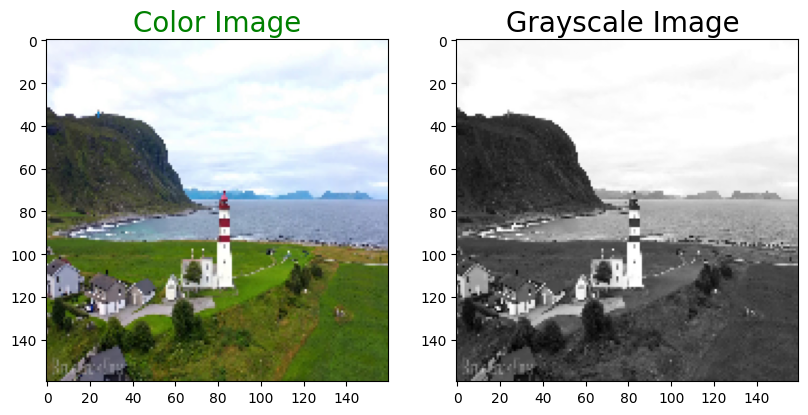

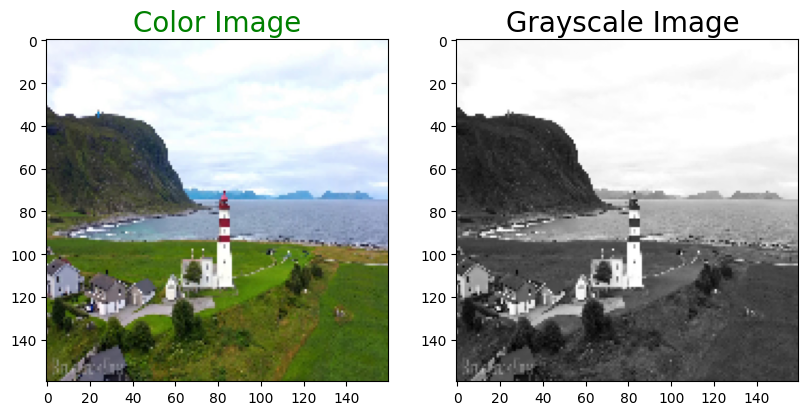

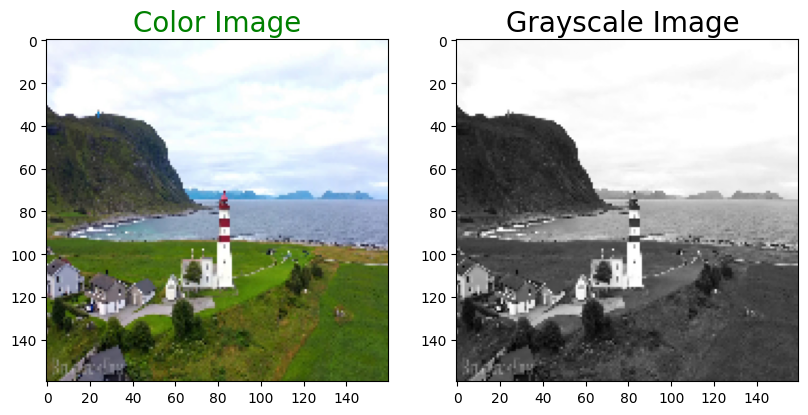

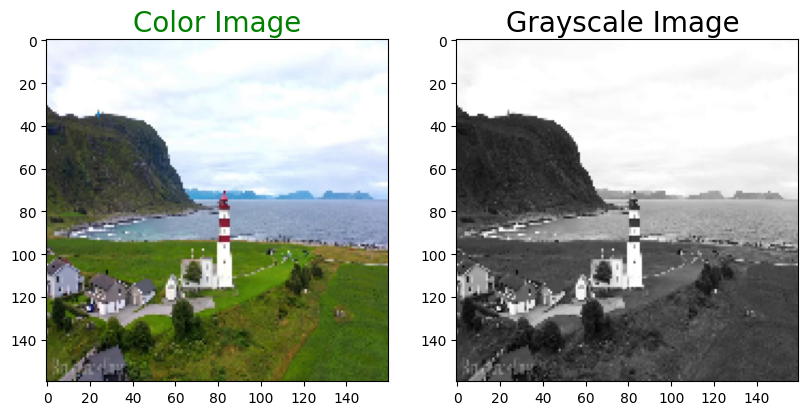

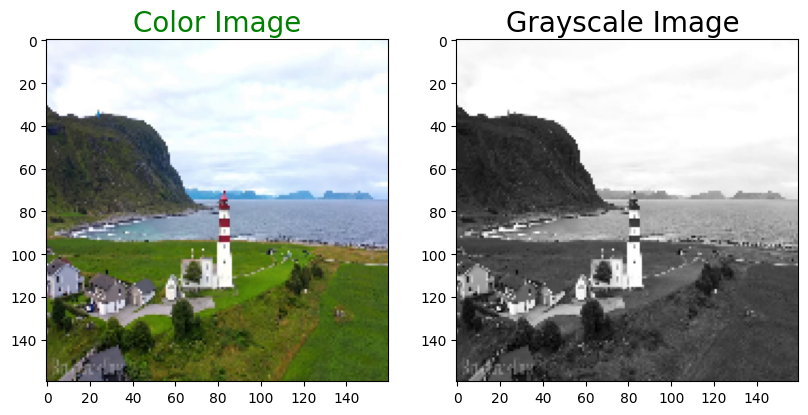

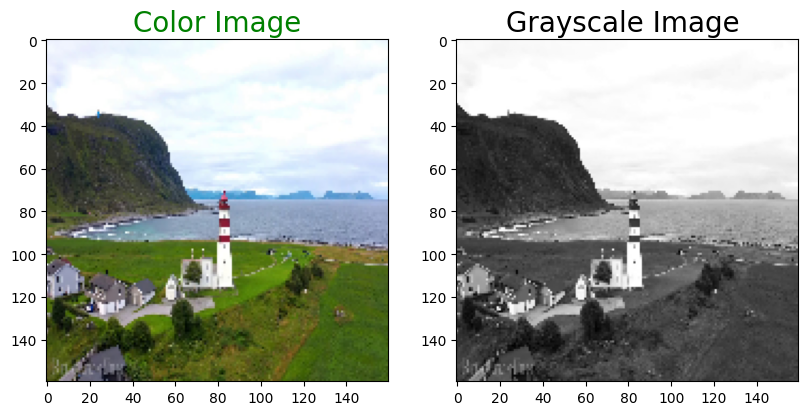

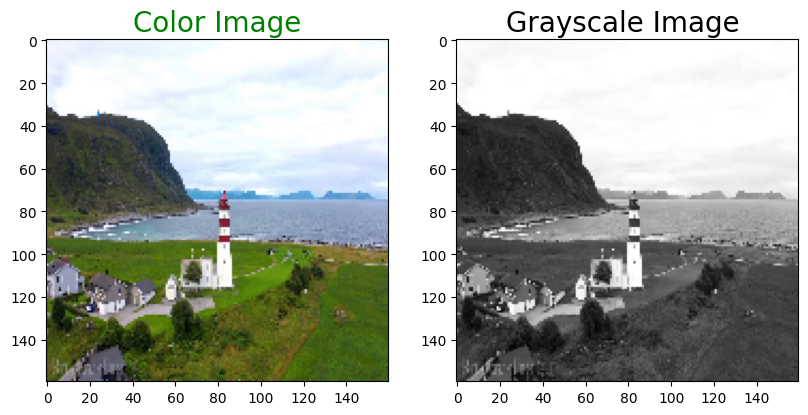

In [ ]:
for i in range(3,10):
     plot_images(color_img[i],gray_img[i])

In [ ]:
import cv2
import os

image_folder = 'images'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


In [ ]:
train_gray_image = gray_img[:80]
train_color_image = color_img[:80]

test_gray_image = gray_img[80:]
test_color_image = color_img[80:]
# reshaping
train_g = np.reshape(train_gray_image,(len(train_gray_image),SIZE,SIZE,3))
train_c = np.reshape(train_color_image, (len(train_color_image),SIZE,SIZE,3))
print('Train color image shape:',train_c.shape)


test_gray_image = np.reshape(test_gray_image,(len(test_gray_image),SIZE,SIZE,3))
test_color_image = np.reshape(test_color_image, (len(test_color_image),SIZE,SIZE,3))
print('Test color image shape',test_color_image.shape)

Train color image shape: (80, 160, 160, 3)
Test color image shape (20, 160, 160, 3)


In [ ]:
from keras import layers
def down(filters , kernel_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

In [ ]:
def model():
    inputs = layers.Input(shape= [160,160,3])
    d1 = down(128,(3,3),False)(inputs)
    d2 = down(128,(3,3),False)(d1)
    d3 = down(256,(3,3),True)(d2)
    d4 = down(512,(3,3),True)(d3)

    d5 = down(512,(3,3),True)(d4)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u5 = layers.concatenate([u5,inputs])
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

model = model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 80, 80, 128)          3584      ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 40, 40, 128)          147584    ['sequential[0][0]']          
                                                                                                  
 sequential_2 (Sequential)   (None, 20, 20, 256)          296192    ['sequential_1[0][0]']        
                                                                                              

In [ ]:
class PrintEpochStatus(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{self.params['epochs']}: "
              f"Loss: {logs['loss']:.4f}, "
              f"Accuracy: {logs['acc']:.4f}, "
            )


model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

model.fit(train_g, train_c, epochs = 10, batch_size = 10,verbose = 0, callbacks=[PrintEpochStatus()])

Epoch 1/10: Loss: 0.1845, Accuracy: 0.3964, 
Epoch 2/10: Loss: 0.1058, Accuracy: 0.4735, 
Epoch 3/10: Loss: 0.0853, Accuracy: 0.4778, 
Epoch 4/10: Loss: 0.0762, Accuracy: 0.5168, 
Epoch 5/10: Loss: 0.0716, Accuracy: 0.5529, 
Epoch 6/10: Loss: 0.0698, Accuracy: 0.5847, 
Epoch 7/10: Loss: 0.0653, Accuracy: 0.6051, 
Epoch 8/10: Loss: 0.0617, Accuracy: 0.6272, 
Epoch 9/10: Loss: 0.0594, Accuracy: 0.6342, 
Epoch 10/10: Loss: 0.0568, Accuracy: 0.6405, 


1/1 [==============================] - 0s 175ms/step


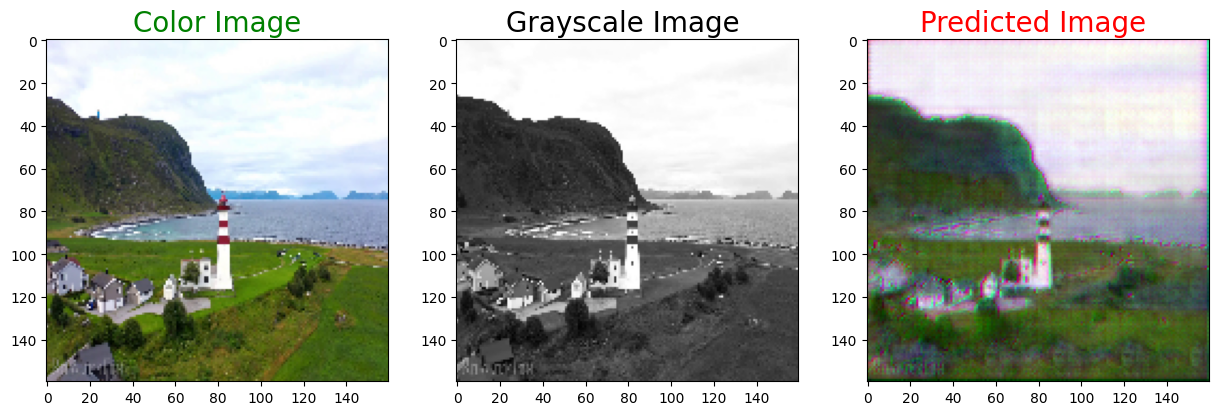

NameError: name 'im1' is not defined

In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)

    plt.show()

for i in range(0,20):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_color_image[i],test_gray_image[i],predicted)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a function to plot and save images
def plot_images(color, grayscale, predicted, save_path):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image', color = 'black', fontsize = 20)
    plt.imshow(grayscale, cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Predicted Image', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
    plt.savefig(save_path)  # Save the plot
    plt.close()  # Close the plot to release memory

# Create a directory to save the images if it doesn't exist


# Loop over the images
for i in range(0,20):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    plot_images(test_color_image[i],test_gray_image[i],predicted, os.path.join(save_dir, f"predicted_image_{i}.png"))


1/1 [==============================] - 0s 105ms/step


In [ ]:
from PIL import Image
import PIL

In [ ]:
import numpy as np
import os
from PIL import Image

# Create a directory to save the images if it doesn't exist
save_dir = '/content/drive/MyDrive/predicted_images'


# Loop over the images
for i in range(0,20):
    predicted = np.clip(model.predict(test_gray_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(SIZE, SIZE,3)
    predicted_image = Image.fromarray((predicted * 255).astype(np.uint8))
    predicted_image.save(os.path.join(save_dir, f"predicted_image_{i}.jpg"))


1/1 [==============================] - 0s 104ms/step


In [ ]:
import cv2
import os

image_folder = '/content/drive/MyDrive/predicted_images'
video_name = 'video.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
# # print(images[0])
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

IndexError: list index out of range